# 1 - Understand the Problem  🤔

_________

# Content ✅


Car_ID	      ------->	     	Unique id of each observation (Interger)

Symboling 	   -------> 	    	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 

carCompany	  ------->  		Name of car company (Categorical)

fueltype	    ------->		Car fuel type i.e gas or diesel (Categorical)

aspiration	    ------->		Aspiration used in a car (Categorical

doornumber	  ------->  		Number of doors in a car (Categorical)

carbody	    ------->		body of car (Categorical

drivewheel	  -------> 		type of drive wheel (Categorical)

enginelocation	    ------->		Location of car engine (Categorical)

wheelbase	  ------->  		Weelbase of car (Numeric)

carlength	 ------->   		Length of car (Numeric)

carwidth	------->    		Width of car (Numeric)

carheight	  ------->  		height of car (Numeric

curbweight	 ------->  		The weight of a car without occupants or baggage. (Numeric)

enginetype   ------->			Type of engine. (Categorical)

cylindernumber	  ------->  		cylinder placed in the car (Categorical)

enginesize	    ------->		Size of car (Numeric)

fuelsystem	    ------->		Fuel system of car (Categorical)

boreratio	------->   		Boreratio of car (Numeric)

stroke	  -------> 		Stroke or volume inside the engine (Numeric)

compressionratio   	------->		compression ratio of car (Numeric)

horsepower	 -------> 		Horsepower (Numeric)
 
peakrpm	  ------->		car peak rpm (Numeric)

citympg	------->	  	Mileage in city (Numeric)

highwaympg	------->  		Mileage on highway (Numeric)

price(Dependent variable)   ------->	  		Price of car (Numeric)


_______

# target 🛑

The main objective is to train a predictive model that enables the company to accurately forecast car prices, helping optimize pricing strategies and maximize revenue in the automotive market.

______________________

# import 🚛

In [843]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures , StandardScaler ,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# 2 - Collect and Prepare the Data

In [844]:
path = "D:\\projects\\datasets\\CarPrice_Assignment.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns',len(df.columns))
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


# Exploratory Data Analysis (EDA) 🔍 

In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carname           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [846]:
df.describe()

,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [847]:
df.isna().sum().to_frame()

,0
car_id,0
symboling,0
carname,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [848]:
df.duplicated().sum()

0

In [849]:
df['carname'].value_counts().to_frame()

,count
carname,
toyota corona,6
toyota corolla,6
peugeot 504,6
subaru dl,4
mitsubishi mirage g4,3
mazda 626,3
toyota mark ii,3
mitsubishi outlander,3
mitsubishi g4,3


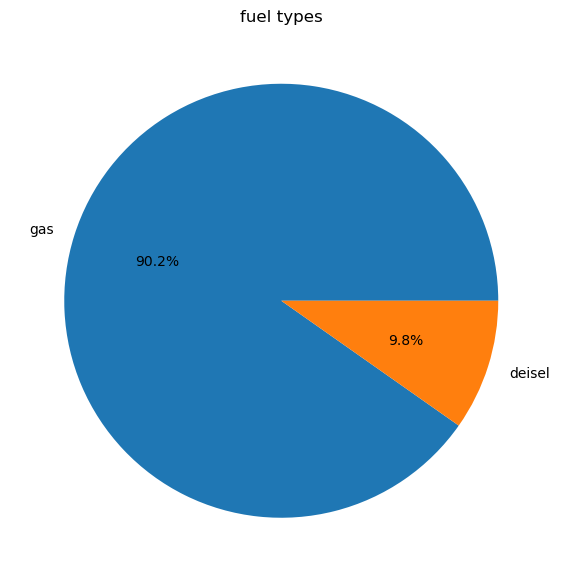

In [850]:
fueltype = df['fueltype'].value_counts()
plt.figure(figsize=(7,10))
plt.pie(fueltype,labels=['gas','deisel'] , autopct='%1.1f%%')
plt.title('fuel types')
plt.show()

gas cars dominates
____________

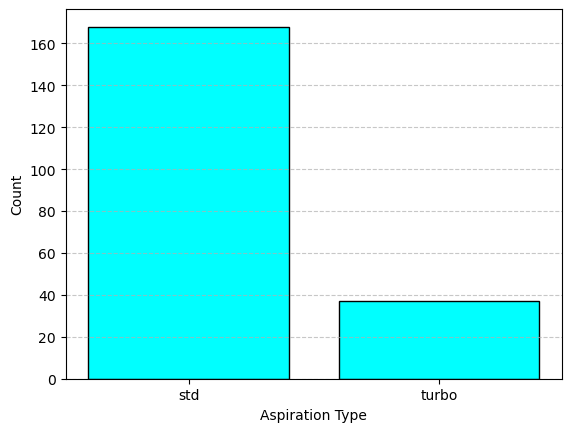

In [851]:
aspiration = df['aspiration'].value_counts()
plt.bar(['std','turbo'],aspiration, color='cyan', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Aspiration Type')
plt.ylabel('Count')
plt.show()

the majority of the cars are air aspiration ( std ) 
___________

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


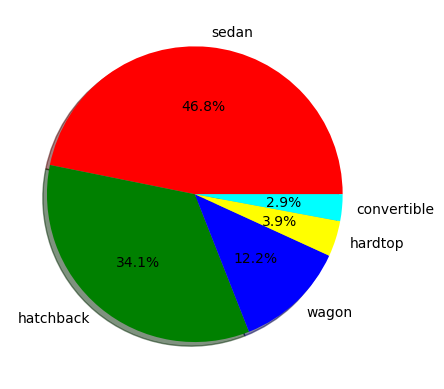

In [852]:
carbody = df['carbody'].value_counts().sort_values(ascending=False)
print(carbody)
labels = ['sedan','hatchback','wagon','hardtop','convertible']
plt.pie(carbody,colors=['red','green','blue','yellow','cyan'],labels=labels,shadow=True, autopct='%1.1f%%')
plt.show()

enginelocation
front    202
rear       3
Name: count, dtype: int64


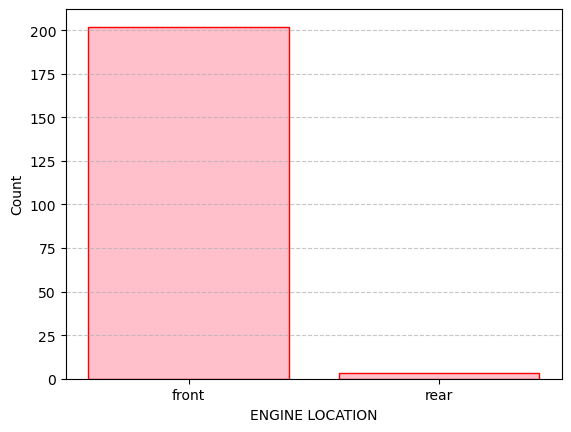

In [853]:
englocation = df['enginelocation'].value_counts()
print(englocation)
plt.bar(['front','rear'],englocation, color='pink', edgecolor='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('ENGINE LOCATION')
plt.ylabel('Count')
plt.show()

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_id             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


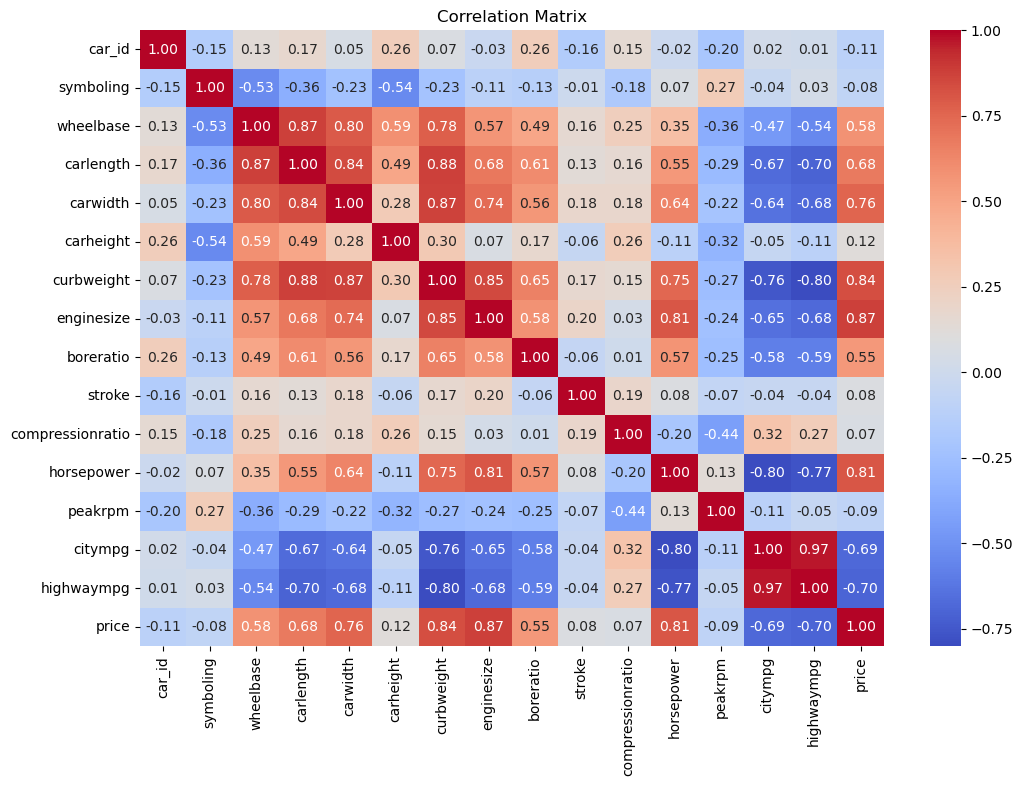

In [854]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix['price'].sort_values(ascending=False))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

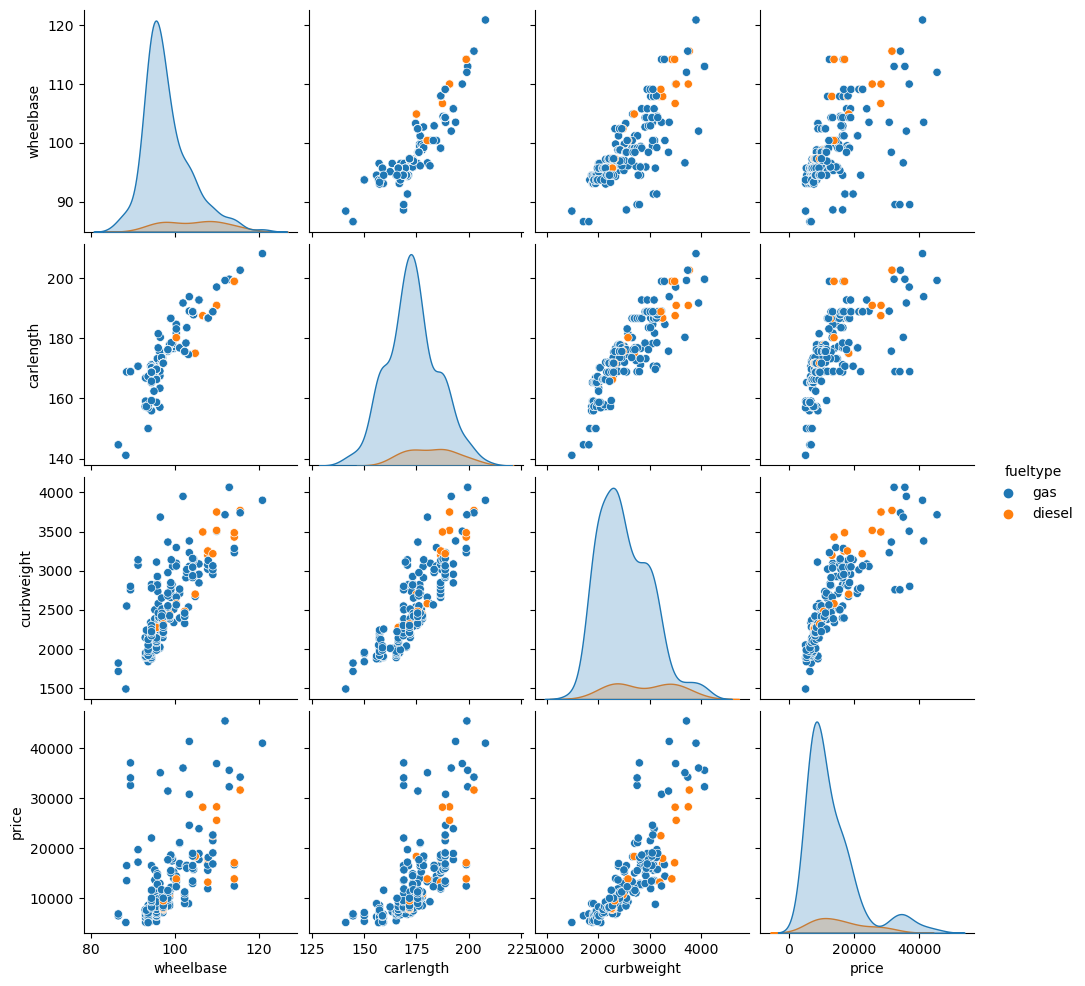

In [855]:
sns.pairplot(df, vars=['wheelbase', 'carlength', 'curbweight', 'price'], hue='fueltype')
plt.show()

# Feature Engineering

In [856]:
df['hp_weight_ratio'] = df['horsepower'] / df['curbweight']
print(df['hp_weight_ratio'].to_frame())

     hp_weight_ratio
0           0.043564
1           0.043564
2           0.054552
3           0.043646
4           0.040722
5           0.043877
6           0.038678
7           0.037238
8           0.045366
9           0.052407
10          0.042171
11          0.042171
12          0.044649
13          0.043761
14          0.039607
15          0.056347
16          0.053846
17          0.051926
18          0.032258
19          0.037353
20          0.036668
21          0.036247
22          0.036247
23          0.047932
24          0.034570
25          0.034188
26          0.034188
27          0.046554
28          0.034714
29          0.051583
30          0.033859
31          0.041781
32          0.032662
33          0.039175
34          0.038855
35          0.037811
36          0.037549
37          0.038462
38          0.037571
39          0.037326
40          0.036256
41          0.040974
42          0.043611
43          0.033376
44          0.037353
45          0.036668
46          0

__________

#  Preprocessing 🧮

In [857]:
print("null value sum : ",df.isna().sum().sum())
print("duplicates value sum : ",df.duplicated().sum())
#no need for cleaning or fill_nullvalues

null value sum :  0
duplicates value sum :  0


In [858]:
copy = df.copy()
copy.drop(columns=['car_id','carname'],inplace=True)
copy

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hp_weight_ratio
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,0.043564
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,0.043564
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,0.054552
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,0.043646
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,0.040722
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,0.043877
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,0.038678
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,0.037238
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,0.045366
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,0.052407


# Categorical encoding

In [859]:
doornumber = copy['doornumber'].value_counts().sort_values(ascending=False)
drivewheel = copy['drivewheel'].value_counts().sort_values(ascending=False)
enginetype = copy['enginetype'].value_counts().sort_values(ascending=False)
cylinernumber = copy['cylindernumber'].value_counts().sort_values(ascending=False)
fuelsystem = copy['fuelsystem'].value_counts().sort_values(ascending=False)
drivewheel = copy['aspiration'].value_counts().sort_values(ascending=False)
drivewheel = copy['fueltype'].value_counts().sort_values(ascending=False)
drivewheel = copy['carbody'].value_counts().sort_values(ascending=False)
enginelocation = copy['enginelocation'].value_counts().sort_values(ascending=False)

print(doornumber)
print(drivewheel)
print(enginetype)
print(cylinernumber)
print(fuelsystem)
print(aspiration)
print(fueltype)
print(carbody)
print(enginelocation)

doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
fueltype
gas       185
diesel     20
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64


In [860]:
columns = ['doornumber', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'aspiration', 'fueltype', 'carbody','enginelocation']

for col in columns:
    if col == 'doornumber':
        conditions = [
            (copy[col] == 'four'),    # If doornumber is 'four'
            (copy[col] == 'two')      # If doornumber is 'two'
        ]
        values = [1, 2] 
        
    elif col == 'drivewheel':
        conditions = [
            (copy[col] == 'fwd'),    # front-wheel drive
            (copy[col] == 'rwd'),    # rear-wheel drive
            (copy[col] == '4wd')     # four-wheel drive
        ]
        values = [1, 2, 3]  

    elif col == 'enginetype':
        conditions = [
            (copy[col] == 'ohc'),    # overhead cam
            (copy[col] == 'ohcf'),   # overhead cam front
            (copy[col] == 'ohcv'),   # overhead cam vertical
            (copy[col] == 'dohc'),   # dual overhead cam
            (copy[col] == 'l'),      # inline engine
            (copy[col] == 'rotor'),  # rotor engine
            (copy[col] == 'dohcv')   # dual overhead cam vertical
        ]
        values = [1, 2, 3, 4, 5, 6, 7]   
        
    elif col == 'cylindernumber':
        conditions = [
            (copy[col] == 'four'),
            (copy[col] == 'six'),
            (copy[col] == 'five'),
            (copy[col] == 'eight'),
            (copy[col] == 'two'),
            (copy[col] == 'three'),
            (copy[col] == 'twelve')
        ]
        values = [1, 2, 3, 4, 5, 6, 7]  

    elif col == 'fuelsystem':
        conditions = [
            (copy[col] == 'mpfi'),  # Multi-point fuel injection
            (copy[col] == '2bbl'),  # 2-barrel carburetor
            (copy[col] == 'idi'),   # Idi fuel system
            (copy[col] == '1bbl'),  # 1-barrel carburetor
            (copy[col] == 'spdi'),  # Single-point direct injection
            (copy[col] == '4bbl'),  # 4-barrel carburetor
            (copy[col] == 'mfi'),   # Mechanical fuel injection
            (copy[col] == 'spfi')   # Single-point fuel injection
        ]
        values = [1, 2, 3, 4, 5, 6, 7, 8] 

    elif col == 'aspiration':
        conditions = [
            (copy[col] == 'std'),   # Standard aspiration
            (copy[col] == 'turbo')  # Turbocharged
        ]
        values = [1, 2]

    elif col == 'fueltype':
        conditions = [
            (copy[col] == 'gas'),    # Gas fuel
            (copy[col] == 'diesel')  # Diesel fuel
        ]
        values = [1, 2]

    elif col == 'carbody':
        conditions = [
            (copy[col] == 'sedan'),
            (copy[col] == 'hatchback'),
            (copy[col] == 'wagon'),
            (copy[col] == 'hardtop'),
            (copy[col] == 'convertible')
        ]
        values = [1, 2, 3, 4, 5]
        
    elif col =='enginelocation':
            conditions = [
                (copy[col]=='front'),
                (copy[col]=='rear')
            ]
            values = [1,2]


    copy[col] = np.select(conditions, values, default=0)

copy


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hp_weight_ratio
0,3,1,1,2,5,2,1,88.6,168.8,64.1,48.8,2548,4,1,130,1,3.47,2.680,9.00,111,5000,21,27,13495.000,0.043564
1,3,1,1,2,5,2,1,88.6,168.8,64.1,48.8,2548,4,1,130,1,3.47,2.680,9.00,111,5000,21,27,16500.000,0.043564
2,1,1,1,2,2,2,1,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.470,9.00,154,5000,19,26,16500.000,0.054552
3,2,1,1,1,1,1,1,99.8,176.6,66.2,54.3,2337,1,1,109,1,3.19,3.400,10.00,102,5500,24,30,13950.000,0.043646
4,2,1,1,1,1,3,1,99.4,176.6,66.4,54.3,2824,1,3,136,1,3.19,3.400,8.00,115,5500,18,22,17450.000,0.040722
5,2,1,1,2,1,1,1,99.8,177.3,66.3,53.1,2507,1,3,136,1,3.19,3.400,8.50,110,5500,19,25,15250.000,0.043877
6,1,1,1,1,1,1,1,105.8,192.7,71.4,55.7,2844,1,3,136,1,3.19,3.400,8.50,110,5500,19,25,17710.000,0.038678
7,1,1,1,1,3,1,1,105.8,192.7,71.4,55.7,2954,1,3,136,1,3.19,3.400,8.50,110,5500,19,25,18920.000,0.037238
8,1,1,2,1,1,1,1,105.8,192.7,71.4,55.9,3086,1,3,131,1,3.13,3.400,8.30,140,5500,17,20,23875.000,0.045366
9,0,1,2,2,2,3,1,99.5,178.2,67.9,52.0,3053,1,3,131,1,3.13,3.400,7.00,160,5500,16,22,17859.167,0.052407


________

# detecting outliers  🗺️

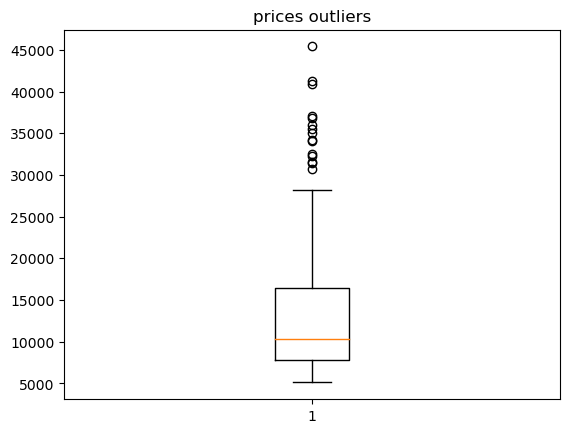

In [861]:
prices = df['price']
plt.boxplot(prices)
plt.title('prices outliers')
plt.show()

In [862]:
df_filt = copy.copy()

for column in df_filt.columns:
    Q1 = df_filt[column].quantile(0.25)
    Q3 = df_filt[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filt = df_filt[(df_filt[column] >= lower_bound) & (df_filt[column] <= upper_bound)]

df_filt.shape


(65, 25)

______________

# model building  📈

# 1.2 - linear model ( original data )

In [863]:
# Assuming df_filt is your DataFrame
columns = df_filt.columns
x = copy[['enginesize','curbweight','horsepower','highwaympg','citympg']]
y = copy['price']

# Step 1: Split the data into training, validation, and test sets
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  # 20% for testing
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=0)  # 25% of the remaining 80%

# Step 2: Train the model on the training set
model = LinearRegression()
model.fit(x_train, y_train)

# Step 3: Validate the model using the validation set
y_val_pred = model.predict(x_val)
mse_val = mean_squared_error(y_val, y_val_pred)
R_val = model.score(x_val, y_val)  # R^2 for validation set

# Calculate Adjusted R^2 for validation set
n_val = len(y_val)
p = x_val.shape[1]
adjusted_r_squared_val = 1 - ((1 - R_val**2) * (n_val - 1)) / (n_val - p - 1)

# Print results for validation
print("Validation Results:")
print(f"Mean Squared Error: {mse_val}")
print(f"R^2: {R_val}")
print(f"Adjusted R^2: {adjusted_r_squared_val}")
##########################################################################################################

# Step 4: Test the model using the test set
y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
R_test = model.score(x_test, y_test)  # R^2 for test set

# Calculate Adjusted R^2 for test set
n_test = len(y_test)
adjusted_r_squared_test = 1 - ((1 - R_test**2) * (n_test - 1)) / (n_test - p - 1)


# Print results for test
print("\nTest Results:")
print(f"Mean Squared Error: {mse_test}")
print(f"R^2: {R_test}")
print(f"Adjusted R^2: {adjusted_r_squared_test}")

######################################################################################################

# Print coefficients
print("\nModel Coefficients:")
for i, feature in enumerate(x.columns):
    print(f"Feature: {feature} : {model.coef_[i]}")

print(f"Intercept: {model.intercept_}")


Validation Results:
Mean Squared Error: 10302324.649325434
R^2: 0.7416415132972272
Adjusted R^2: 0.48575101056662995

Test Results:
Mean Squared Error: 15214876.35402552
R^2: 0.8034669066922782
Adjusted R^2: 0.5949246515996092

Model Coefficients:
Feature: enginesize : 67.58380223548275
Feature: curbweight : 5.326863850732126
Feature: horsepower : 60.303599767195294
Feature: highwaympg : 49.321179065064214
Feature: citympg : -34.477680492973015
Intercept: -15740.789129925106


In [864]:
data = {
    'enginesize': [150],  # Example engine sizes
    'curbweight': [3000],  # Example curb weights
    'horsepower': [150],  # Example horsepower values
    'highwaympg': [31],  # Example highway MPG
    'citympg': [22]  # Example city MPG
}

df_new = pd.DataFrame(data)

predicted_prices = model.predict(df_new)

# Print the predicted prices
print("Predicted Prices:",predicted_prices[0]," $$$$$")



Predicted Prices: 20193.360302844565  $$$$$


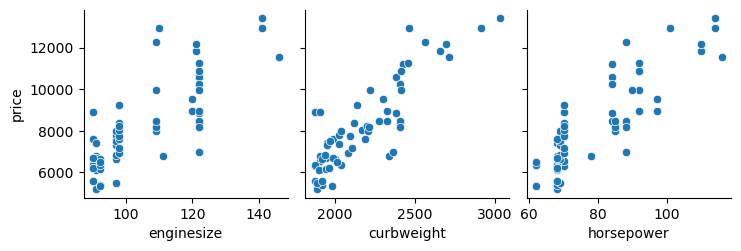

In [865]:
sns.pairplot(df_filt, x_vars=['enginesize', 'curbweight', 'horsepower'], y_vars='price', kind='scatter')
plt.show()

_____________________
# 1.3 - linear model ( filtered data )

In [866]:
# Assuming df_filt is your DataFrame
columns = df_filt.columns
x = df_filt[['enginesize','curbweight','horsepower','highwaympg','citympg']]
y = df_filt['price']

# Step 1: Split the data into training, validation, and test sets
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  # 20% for testing
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=0)  # 25% of the remaining 80%

# Step 2: Train the model on the training set
model = LinearRegression()
model.fit(x_train, y_train)

# Step 3: Validate the model using the validation set
y_val_pred = model.predict(x_val)
mse_val = mean_squared_error(y_val, y_val_pred)
R_val = model.score(x_val, y_val)  # R^2 for validation set

# Calculate Adjusted R^2 for validation set
n_val = len(y_val)
p = x_val.shape[1]
adjusted_r_squared_val = 1 - ((1 - R_val**2) * (n_val - 1)) / (n_val - p - 1)

# Print results for validation
print("Validation Results:")
print(f"Mean Squared Error: {mse_val}")
print(f"R^2: {R_val}")
print(f"Adjusted R^2: {adjusted_r_squared_val}")
##########################################################################################################

# Step 4: Test the model using the test set
y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
R_test = model.score(x_test, y_test)  # R^2 for test set

# Calculate Adjusted R^2 for test set
n_test = len(y_test)
adjusted_r_squared_test = 1 - ((1 - R_test**2) * (n_test - 1)) / (n_test - p - 1)


# Print results for test
print("\nTest Results:")
print(f"Mean Squared Error: {mse_test}")
print(f"R^2: {R_test}")
print(f"Adjusted R^2: {adjusted_r_squared_test}")

######################################################################################################

# Print coefficients
print("\nModel Coefficients:")
for i, feature in enumerate(x.columns):
    print(f"Feature: {feature} : {model.coef_[i]}")

print(f"Intercept: {model.intercept_}")


Validation Results:
Mean Squared Error: 1230178.0625439766
R^2: 0.7658167509233005
Adjusted R^2: 0.29110050741952087

Test Results:
Mean Squared Error: 1070899.0327989294
R^2: 0.800675579706682
Adjusted R^2: 0.38471094389479654

Model Coefficients:
Feature: enginesize : -42.2885696232706
Feature: curbweight : 5.0343545325627845
Feature: horsepower : 84.85688648101201
Feature: highwaympg : -127.06069148082915
Feature: citympg : 157.38859307147953
Intercept: -5034.357824559029


_______________
# Tune the Model  🚀

_______________
# 2 - polynomial model ( filtered data ) 

In [867]:
# Assuming df_filt is your DataFrame
columns = df_filt.columns
x = df_filt.drop(columns=['price'])
y = df_filt['price']


# Step 1: Split the data into training, validation, and test sets
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  # 20% for testing
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=0)  # 25% of remaining


# Step 2: Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_test_poly = poly.transform(x_test)


# Function to calculate adjusted R^2
def adjusted_r_squared(r_squared, n, p):
    return 1 - (1 - r_squared) * (n - 1) / (n - p - 1)


########################################################################################################
# Step 3: Apply Ridge Regression

# Ridge on Validation Set

scaler = StandardScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_val_poly_scaled = scaler.transform(x_val_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

ridge_model = Ridge(alpha=0.10)  # You can adjust alpha for regularization strength
ridge_model.fit(x_train_poly_scaled, y_train)



# Validation Evaluation
y_val_pred = ridge_model.predict(x_val_poly_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
r_squared_val = ridge_model.score(x_val_poly_scaled, y_val)
n_val = len(y_val)
p_val = x_val_poly_scaled.shape[1]
adjusted_r2_val = adjusted_r_squared(r_squared_val, n_val, p_val)

print("\nRidge Regression - Validation Results:")
print(f"Mean Squared Error: {mse_val}")
print(f"R^2: {r_squared_val}")
print(f"Adjusted R^2: {adjusted_r2_val}")




# Test Set Evaluation
y_test_pred = ridge_model.predict(x_test_poly_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = ridge_model.score(x_test_poly_scaled, y_test)
n_test = len(y_test)
p_test = x_test_poly_scaled.shape[1]
adjusted_r2_test = adjusted_r_squared(r_squared_test, n_test, p_test)

print("\nRidge Regression - Test Results:")
print(f"Mean Squared Error: {mse_test}")
print(f"R^2: {r_squared_test}")
print(f"Adjusted R^2: {adjusted_r2_test}")

##########################################################################################################
# Step 4: Apply Lasso Regression

# Lasso on Validation Set
lasso_model = Lasso(alpha=100)  # You can adjust alpha for regularization strength
lasso_model.fit(x_train_poly, y_train)



# Validation Evaluation
y_val_pred_lasso = lasso_model.predict(x_val_poly)
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r_squared_val_lasso = lasso_model.score(x_val_poly, y_val)
adjusted_r2_val_lasso = adjusted_r_squared(r_squared_val_lasso, n_val, p_val)

print("\nLasso Regression - Validation Results:")
print(f"Mean Squared Error: {mse_val_lasso}")
print(f"R^2: {r_squared_val_lasso}")
print(f"Adjusted R^2: {adjusted_r2_val_lasso}")



# Test Set Evaluation
y_test_pred_lasso = lasso_model.predict(x_test_poly)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r_squared_test_lasso = lasso_model.score(x_test_poly, y_test)
adjusted_r2_test_lasso = adjusted_r_squared(r_squared_test_lasso, n_test, p_test)

print("\nLasso Regression - Test Results:")
print(f"Mean Squared Error: {mse_test_lasso}")
print(f"R^2: {r_squared_test_lasso}")
print(f"Adjusted R^2: {adjusted_r2_test_lasso}")



Ridge Regression - Validation Results:
Mean Squared Error: 1478614.025686725
R^2: 0.7185231575747456
Adjusted R^2: 1.0107914444380288

Ridge Regression - Test Results:
Mean Squared Error: 1969000.9563929364
R^2: 0.6335135599438901
Adjusted R^2: 1.0140505983408092

Lasso Regression - Validation Results:
Mean Squared Error: 2866982.267499875
R^2: 0.4542259833019884
Adjusted R^2: 1.020924243451681

Lasso Regression - Test Results:
Mean Squared Error: 2813510.8495312077
R^2: 0.47632652388708985
Adjusted R^2: 1.0200769383813257


In [868]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso

# Assuming `poly` and `scaler` are already fitted, and ridge_model and lasso_model are trained

# Example new input data (replace this with your actual data)
new_data = pd.DataFrame({
    'symboling': [3],
    'fueltype': [1],
    'aspiration': [2],
    'doornumber': [2],
    'carbody': [2],
    'drivewheel': [2],
    'enginelocation': [1],
    'wheelbase': [98.4],
    'carlength': [168.8],
    'carwidth': [64.1],
    'carheight': [54.3],
    'curbweight': [3000],
    'enginetype': [4],
    'cylindernumber': [4],
    'enginesize': [150],
    'fuelsystem': [3],
    'boreratio': [3.19],
    'stroke': [3.4],
    'compressionratio': [9.0],
    'horsepower': [150],
    'peakrpm': [5000],
    'citympg': [22],
    'highwaympg': [31],
    'hp_weight_ratio': [0.0433]
})

# Step 1: Preprocess the new data
new_data_poly = poly.transform(new_data)
new_data_poly_scaled = scaler.transform(new_data_poly)

# Step 2: Make predictions
ridge_prediction = ridge_model.predict(new_data_poly_scaled)
lasso_prediction = lasso_model.predict(new_data_poly)

# Output the predictions
print(f"Predicted price using Ridge Regression: {ridge_prediction[0]}")
print(f"Predicted price using Lasso Regression: {lasso_prediction[0]}")


Predicted price using Ridge Regression: 76304.59416261516
Predicted price using Lasso Regression: 16976.892222935472


 _______________
# 2.1 - polynomial model ( original data ) 

In [869]:
# Assuming df_filt is your DataFrame
columns = df_filt.columns
x = copy.drop(columns=['price'])
y = copy['price']



# Step 1: Split the data into training, validation, and test sets
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  # 20% for testing
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=0)  # 25% of remaining



# Step 2: Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_test_poly = poly.transform(x_test)

# Function to calculate adjusted R^2
def adjusted_r_squared(r_squared, n, p):
    return 1 - (1 - r_squared) * (n - 1) / (n - p - 1)


##########################################################################################################
# Step 3: Apply Ridge Regression

# Ridge on Validation Set

scaler = StandardScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_val_poly_scaled = scaler.transform(x_val_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

ridge_model = Ridge(alpha=0.10)  # You can adjust alpha for regularization strength
ridge_model.fit(x_train_poly_scaled, y_train)



# Validation Evaluation
y_val_pred = ridge_model.predict(x_val_poly_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
r_squared_val = ridge_model.score(x_val_poly_scaled, y_val)
n_val = len(y_val)
p_val = x_val_poly_scaled.shape[1]
adjusted_r2_val = adjusted_r_squared(r_squared_val, n_val, p_val)

print("\nRidge Regression - Validation Results:")
print(f"Mean Squared Error: {mse_val}")
print(f"R^2: {r_squared_val}")
print(f"Adjusted R^2: {adjusted_r2_val}")



# Test Set Evaluation
y_test_pred = ridge_model.predict(x_test_poly_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = ridge_model.score(x_test_poly_scaled, y_test)
n_test = len(y_test)
p_test = x_test_poly_scaled.shape[1]
adjusted_r2_test = adjusted_r_squared(r_squared_test, n_test, p_test)

print("\nRidge Regression - Test Results:")
print(f"Mean Squared Error: {mse_test}")
print(f"R^2: {r_squared_test}")
print(f"Adjusted R^2: {adjusted_r2_test}")



##########################################################################################################
# Step 4: Apply Lasso Regression

# Lasso on Validation Set
lasso_model = Lasso(alpha=100)  # You can adjust alpha for regularization strength
lasso_model.fit(x_train_poly, y_train)

# Validation Evaluation
y_val_pred_lasso = lasso_model.predict(x_val_poly)
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r_squared_val_lasso = lasso_model.score(x_val_poly, y_val)
adjusted_r2_val_lasso = adjusted_r_squared(r_squared_val_lasso, n_val, p_val)

print("\nLasso Regression - Validation Results:")
print(f"Mean Squared Error: {mse_val_lasso}")
print(f"R^2: {r_squared_val_lasso}")
print(f"Adjusted R^2: {adjusted_r2_val_lasso}")




# Test Set Evaluation
y_test_pred_lasso = lasso_model.predict(x_test_poly)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r_squared_test_lasso = lasso_model.score(x_test_poly, y_test)
adjusted_r2_test_lasso = adjusted_r_squared(r_squared_test_lasso, n_test, p_test)

print("\nLasso Regression - Test Results:")
print(f"Mean Squared Error: {mse_test_lasso}")
print(f"R^2: {r_squared_test_lasso}")
print(f"Adjusted R^2: {adjusted_r2_test_lasso}")



Ridge Regression - Validation Results:
Mean Squared Error: 7348360.94900899
R^2: 0.8157200943326879
Adjusted R^2: 1.0258638464094474

Ridge Regression - Test Results:
Mean Squared Error: 22664467.94766678
R^2: 0.7072392906597529
Adjusted R^2: 1.0410892223635435

Lasso Regression - Validation Results:
Mean Squared Error: 6228650.551532028
R^2: 0.8437998427083567
Adjusted R^2: 1.021922829093564

Lasso Regression - Test Results:
Mean Squared Error: 11753193.648127817
R^2: 0.8481820390673053
Adjusted R^2: 1.0213077839905536


In [870]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso

# Assuming `poly` and `scaler` are already fitted, and ridge_model and lasso_model are trained

# Example new input data (replace this with your actual data)
new_data = pd.DataFrame({
    'symboling': [3],
    'fueltype': [1],
    'aspiration': [2],
    'doornumber': [2],
    'carbody': [2],
    'drivewheel': [2],
    'enginelocation': [1],
    'wheelbase': [98.4],
    'carlength': [168.8],
    'carwidth': [64.1],
    'carheight': [54.3],
    'curbweight': [3000],
    'enginetype': [4],
    'cylindernumber': [4],
    'enginesize': [150],
    'fuelsystem': [3],
    'boreratio': [3.19],
    'stroke': [3.4],
    'compressionratio': [9.0],
    'horsepower': [150],
    'peakrpm': [5000],
    'citympg': [22],
    'highwaympg': [31],
    'hp_weight_ratio': [0.0433]
})

# Step 1: Preprocess the new data
new_data_poly = poly.transform(new_data)
new_data_poly_scaled = scaler.transform(new_data_poly)

# Step 2: Make predictions
ridge_prediction = ridge_model.predict(new_data_poly_scaled)
lasso_prediction = lasso_model.predict(new_data_poly)

# Output the predictions
print(f"Predicted price using Ridge Regression: {ridge_prediction[0]}")
print(f"Predicted price using Lasso Regression: {lasso_prediction[0]}")


Predicted price using Ridge Regression: 14432.752189240991
Predicted price using Lasso Regression: 8237.739556120381
